In [1]:
!wget http://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip

--2021-02-03 00:40:18--  http://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip
Resolving openi.nlm.nih.gov (openi.nlm.nih.gov)... 130.14.52.157, 2607:f220:41e:7052::157
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.52.157|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip [following]
--2021-02-03 00:40:18--  https://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.52.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3770205534 (3.5G) [application/zip]
Saving to: ‘ChinaSet_AllFiles.zip’

ChinaSet_AllFiles.z 100%[===================>]   3.51G  8.35MB/s    in 7m 11s  

2021-02-03 00:47:30 (8.34 MB/s) - ‘ChinaSet_AllFiles.zip’ saved [3770205534/3770205534]



In [ ]:
!unzip /content/ChinaSet_AllFiles.zip

In [3]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

img=mpimg.imread('/content/ChinaSet_AllFiles/CXR_png/CHNCXR_0001_0.png')

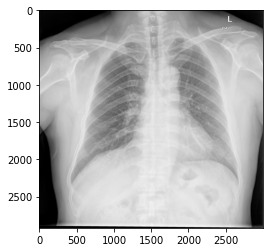

In [4]:
plt.imshow(img)

In [46]:
import os
import pandas as pd

BASE_DIR = '/content/ChinaSet_AllFiles/'
train_folder = BASE_DIR+'CXR_png'
train_annotation = BASE_DIR+'ClinicalReadings/'

files_in_train = sorted(os.listdir(train_folder))
files_in_annotated = sorted(os.listdir(train_annotation))

images=[i for i in files_in_train ]
images=images[0:-1]

labels =[label(train_annotation + i) for i in files_in_annotated]

df = pd.DataFrame()
df['images']=[train_folder+str(x) for x in images]
 
print(len(labels))
df['labels']=[x for x in labels]
print(images[-1])

df.to_csv('files_path.csv', header=None)

662
CHNCXR_0662_1.png


In [29]:
print(labels)

['normal', 'normal', 'normal ', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal\n', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal ', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normale ', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal\n', 'normal\n', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal',

In [30]:
def label(text):
    mylines = []                             # Declare an empty list named mylines.
    with open (text, 'rt') as myfile: # Open lorem.txt for reading text data.
        for myline in myfile:                # For each line, stored as myline,
            mylines.append(myline)           # add its contents to mylines.
    label = mylines[1]
    if label is '\n':
      label = mylines[2]
    #print(label)
    return label

In [48]:
df.head(10)

,images,labels
0,/content/ChinaSet_AllFiles/CXR_pngCHNCXR_0001_...,normal
1,/content/ChinaSet_AllFiles/CXR_pngCHNCXR_0002_...,normal
2,/content/ChinaSet_AllFiles/CXR_pngCHNCXR_0003_...,normal
3,/content/ChinaSet_AllFiles/CXR_pngCHNCXR_0004_...,normal
4,/content/ChinaSet_AllFiles/CXR_pngCHNCXR_0005_...,normal
5,/content/ChinaSet_AllFiles/CXR_pngCHNCXR_0006_...,normal
6,/content/ChinaSet_AllFiles/CXR_pngCHNCXR_0007_...,normal
7,/content/ChinaSet_AllFiles/CXR_pngCHNCXR_0008_...,normal
8,/content/ChinaSet_AllFiles/CXR_pngCHNCXR_0009_...,normal
9,/content/ChinaSet_AllFiles/CXR_pngCHNCXR_0010_...,normal


In [49]:
df.describe()

,images,labels
count,662,662
unique,662,83
top,/content/ChinaSet_AllFiles/CXR_pngCHNCXR_0263_...,normal
freq,1,310


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  662 non-null    object
 1   labels  662 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [56]:
df.isnull().sum()

images    0
labels    0
dtype: int64